In [33]:
# Dependencies and Setup

import pandas as pd
import matplotlib.pyplot as plt

In [34]:
#  FIPS state codes are numeric and two-letter alphabetic codes defined in U.S. Federal Information Processing Standard Publication ("FIPS PUB") 5-2 to identify U.S. states.

temperature_rate = pd.read_csv("../data/model_state.csv")
temperature_rate.head()

fips      Fall    Spring    Summer    Winter max_warming_season    Annual  \
0     1 -0.195668 -0.105862 -0.325009  0.458526             Winter -0.035048   
1     4  1.203951  1.384480  1.274455  1.388388             Winter  1.319880   
2     5 -0.042540  0.266399  0.058596  0.532247             Winter  0.214074   
3     6  1.570921  1.449242  1.478335  1.412430               Fall  1.480561   
4     8  1.055309  1.436910  1.367845  1.838758             Winter  1.438589   

  state_code  state_name  gnis_id  
0         AL     Alabama  1779775  
1         AZ     Arizona  1779777  
2         AR    Arkansas    68085  
3         CA  California  1779778  
4         CO    Colorado  1779779

In [35]:
# Reference DF with US Federal Information Processing Standard state code and name

state_fips_code = temperature_rate[['fips','state_name']]
state_fips_code.head()

fips  state_name
0     1     Alabama
1     4     Arizona
2     5    Arkansas
3     6  California
4     8    Colorado

In [36]:
# Proess user input state

selected_state = input("Please choose the state you are analyzing").title()
if ((selected_state == 'Hawaii') | (selected_state == 'Alaska')):
    print(f"Sorry. At the moment, We are not able to track weather data for the states Hawaii and Alaska. Enter any other US state")
index=state_fips_code.loc[state_fips_code['state_name'] == selected_state]

if ((selected_state != 'Hawaii') and (selected_state != 'Alaska')):
    if index.empty:
        print(f"No match for state {selected_state}. Please re-enter the state")
        selected_state =''
    else:
        print(f"Processing data for {selected_state}")

Please choose the state you are analyzing New Jersey


Processing data for New Jersey


In [40]:
# This dataset presents the age-adjusted death rates for the 10 leading causes of death in the United States beginning in 1999. ICD (International Classification of Diseases)

mortality_rate = (pd.read_csv("../data/mortality_rate_by_US_state.csv")
                      .rename(columns={"Year":"year",
                                       '113 Cause Name': 'icd_cause_name',
                                      'Cause Name': 'cause_name',
                                      'State': 'state',
                                      'Deaths':'deaths',
                                      'Age-adjusted Death Rate':'age_adjusted_death_rate'}))
mortality_rate.head()

year                                     icd_cause_name  \
0  2016  Accidents (unintentional injuries) (V01-X59,Y8...   
1  2016  Accidents (unintentional injuries) (V01-X59,Y8...   
2  2016  Accidents (unintentional injuries) (V01-X59,Y8...   
3  2016  Accidents (unintentional injuries) (V01-X59,Y8...   
4  2016  Accidents (unintentional injuries) (V01-X59,Y8...   

               cause_name       state  deaths  age_adjusted_death_rate  
0  Unintentional injuries     Alabama    2755                     55.5  
1  Unintentional injuries      Alaska     439                     63.1  
2  Unintentional injuries     Arizona    4010                     54.2  
3  Unintentional injuries    Arkansas    1604                     51.8  
4  Unintentional injuries  California   13213                     32.0

In [48]:
# Load climate data by US State FIPS code along with the merged state name for the fips

climate_change = (pd.read_csv("../data/climdiv_state_year.csv")
                          .merge(state_fips_code)
                          .rename(columns = {'temp':'temparature_fahrenheit',
                                              'tempc':'temperature_celsius'}))
climate_change.head()

fips  year  temparature_fahrenheit  temperature_celsius state_name
0     1  1895               61.641667            16.467593    Alabama
1     1  1896               64.266667            17.925926    Alabama
2     1  1897               64.191667            17.884259    Alabama
3     1  1898               62.983333            17.212963    Alabama
4     1  1899               63.100000            17.277778    Alabama

In [49]:
# Identify the mortality data by cause "cancer" to analyze temperature as a cause

cancer_rate = mortality_rate.loc[mortality_rate["cause_name"]=="Cancer"]
cancer_rate

year                 icd_cause_name cause_name    state  deaths  \
1923  2016  Malignant neoplasms (C00-C97)     Cancer  Alabama   10419   
1924  2015  Malignant neoplasms (C00-C97)     Cancer  Alabama   10354   
1925  2014  Malignant neoplasms (C00-C97)     Cancer  Alabama   10286   
1926  2013  Malignant neoplasms (C00-C97)     Cancer  Alabama   10328   
1927  2012  Malignant neoplasms (C00-C97)     Cancer  Alabama   10276   
...    ...                            ...        ...      ...     ...   
2854  2003  Malignant neoplasms (C00-C97)     Cancer  Wyoming     943   
2855  2002  Malignant neoplasms (C00-C97)     Cancer  Wyoming     859   
2856  2001  Malignant neoplasms (C00-C97)     Cancer  Wyoming     923   
2857  2000  Malignant neoplasms (C00-C97)     Cancer  Wyoming     868   
2858  1999  Malignant neoplasms (C00-C97)     Cancer  Wyoming     899   

      age_adjusted_death_rate  
1923                    174.0  
1924                    175.6  
1925                    177.6  
1926                    182.2  
1927                    185.2  
...                       ...  
2854                    188.9  
2855                    177.1  
2856                    194.0  
2857                    185.5  
2858                    195.1  

[936 rows x 6 columns]

In [50]:
cancer_df = cancer_rate.loc[(cancer_rate["year"]>1999) & (cancer_rate["state"]==selected_state)]
cancer_df.head()

year                 icd_cause_name cause_name       state  deaths  \
2463  2016  Malignant neoplasms (C00-C97)     Cancer  New Jersey   16377   
2464  2015  Malignant neoplasms (C00-C97)     Cancer  New Jersey   16270   
2465  2014  Malignant neoplasms (C00-C97)     Cancer  New Jersey   16591   
2466  2013  Malignant neoplasms (C00-C97)     Cancer  New Jersey   16315   
2467  2012  Malignant neoplasms (C00-C97)     Cancer  New Jersey   16485   

      age_adjusted_death_rate  
2463                    149.7  
2464                    150.8  
2465                    156.1  
2466                    156.2  
2467                    160.3

In [100]:
# cancer_df = cancer_rate.loc[(cancer_rate["year"]>1999) & (cancer_rate["State"]=="Colorado")]
# cancer_df

In [51]:
climate_df =climate_change.loc[(climate_change["year"]>1999) & (climate_change["year"]<2017) & (climate_change["state_name"]==selected_state)]
climate_df

fips  year  temparature_fahrenheit  temperature_celsius  state_name
3480    34  2000               52.191667            11.217593  New Jersey
3481    34  2001               53.641667            12.023148  New Jersey
3482    34  2002               54.308333            12.393519  New Jersey
3483    34  2003               51.841667            11.023148  New Jersey
3484    34  2004               53.016667            11.675926  New Jersey
3485    34  2005               53.450000            11.916667  New Jersey
3486    34  2006               54.975000            12.763889  New Jersey
3487    34  2007               53.583333            11.990741  New Jersey
3488    34  2008               53.625000            12.013889  New Jersey
3489    34  2009               52.733333            11.518519  New Jersey
3490    34  2010               54.675000            12.597222  New Jersey
3491    34  2011               54.858333            12.699074  New Jersey
3492    34  2012               55.866667            13.259259  New Jersey
3493    34  2013               53.208333            11.782407  New Jersey
3494    34  2014               51.941667            11.078704  New Jersey
3495    34  2015               53.866667            12.148148  New Jersey
3496    34  2016               54.950000            12.750000  New Jersey

In [47]:
whole_data = cancer_df.merge(climate_df , how= 'outer', on="year" )
yearly_cancer= whole_data.groupby(whole_data["year"]).sum(["Deaths"])
temperature_yearly = whole_data.groupby(whole_data["year"]).mean(["tempc"])
yearly_cancer_deaths= yearly_cancer[["deaths"]]
temperature_yearly_change = temperature_yearly[["tempc"]]
annual_change = temperature_yearly_change.merge(yearly_cancer_deaths, on="year")
annual_change

KeyError: "None of [Index(['tempc'], dtype='object')] are in the [columns]"

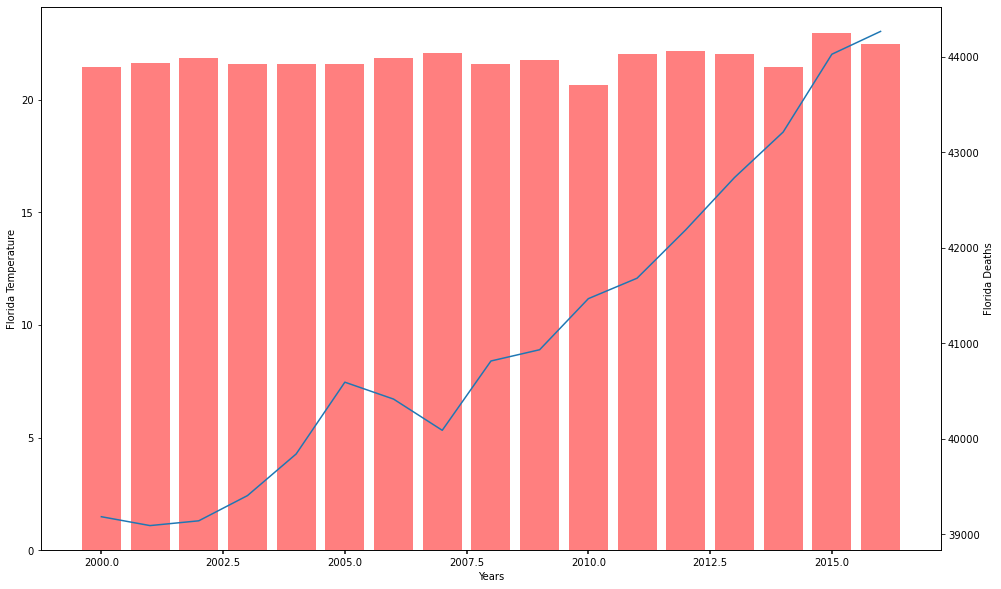

In [35]:
fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)
fig.set_figheight(10)
fig.set_figwidth(20)
twin1 = ax.twinx()

ax.bar(annual_change.index, annual_change["tempc"], color="r", label="Temperature",alpha=0.5 )

twin1.plot(annual_change.index, annual_change["Deaths"], label="Deaths")

ylabel = f"{selected_state} Temperature"
twin_ylabel = f"{selected_state} Deaths"
ax.set_xlabel("Years")
ax.set_ylabel(ylabel)
twin1.set_ylabel(twin_ylabel)

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='x', **tkw)

filename=f"../images/{selected_state}.png"
plt.savefig(filename)
# plt.savefig("../images/colorado.png")
plt.show()